In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

import torchvision
import torchvision.transforms as transforms

from PIL import Image

# Q1) Sigmoid

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NeuralNetwork(nn.Module):
    
    def __init__(self, layer_sizes, activation=F.relu):
        super(NeuralNetwork, self).__init__()
        self.linears = nn.ModuleList(
            [nn.Linear(v, layer_sizes[i+1]) for i, v in enumerate(layer_sizes[:-1])]
        )
        self.activation = activation
        
    def forward(self, x):
        for l in self.linears[:-1]:
            x = self.activation(l(x))

        x = self.linears[-1](x)
        x = F.sigmoid(x)
            
        return x

In [3]:
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.Tensor([0, 1, 1, 0]).reshape(-1, 1)

In [4]:
class XORDataset(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index].to(device), self.y[index].to(device)

In [5]:
xor_data = XORDataset(X, y)
xor_dataloader = DataLoader(xor_data, batch_size=4, shuffle=True)

Final loss = 0.6846773624420166


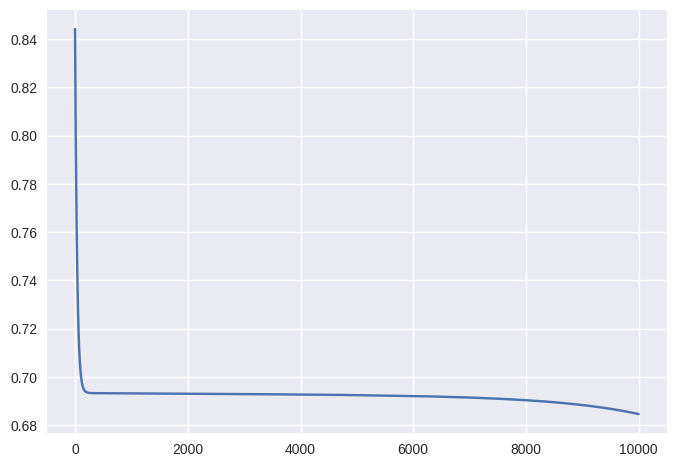

In [16]:
LEARNING_RATE = 0.03
NUM_EPOCHS = 10000

layers = [2, 2, 1]
xor = NeuralNetwork(layers, activation=F.sigmoid).to(device)
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.SGD(xor.parameters(), lr=LEARNING_RATE)
losses = []

for epoch in range(NUM_EPOCHS):

    for batch_inputs, batch_labels in xor_dataloader:
    
        optimizer.zero_grad()
        outputs = xor(batch_inputs)
        loss = criterion(outputs, batch_labels)
        
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())

    # print(f"Finished epoch {epoch+1} / {NUM_EPOCHS}")


print(f"Final loss = {losses[-1]}")
plt.plot(range(NUM_EPOCHS), losses)
plt.show()

In [7]:
preds = xor(X.to(device))
print(preds)

tensor([[0.0036],
        [0.9976],
        [0.9976],
        [0.0039]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [8]:
params = dict(xor.named_parameters())

In [9]:
Xd = X.to(device)
l1_out = Xd @ params['linears.0.weight'].t() + params['linears.0.bias']
l1_act = F.relu(l1_out)
l2_out = l1_act @ params['linears.1.weight'].t() + params['linears.1.bias']
l2_act = F.sigmoid(l2_out)

print(l2_act)

tensor([[1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [10]:
for k,v  in params.items():
    print(k, v)

linears.0.weight Parameter containing:
tensor([[-7.7153, -7.7158],
        [ 9.8049,  9.5533]], device='cuda:0', requires_grad=True)
linears.0.bias Parameter containing:
tensor([11.3548, -4.6538], device='cuda:0', requires_grad=True)
linears.1.weight Parameter containing:
tensor([[12.1675, 12.1476]], device='cuda:0', requires_grad=True)
linears.1.bias Parameter containing:
tensor([-17.9007], device='cuda:0', requires_grad=True)


# Q2) ReLU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NeuralNetwork(nn.Module):
    
    def __init__(self, layer_sizes, activation=F.relu):
        super(NeuralNetwork, self).__init__()
        self.linears = nn.ModuleList(
            [nn.Linear(v, layer_sizes[i+1]) for i, v in enumerate(layer_sizes[:-1])]
        )
        self.activation = activation
        
    def forward(self, x):
        for l in self.linears[:-1]:
            x = self.activation(l(x))

        x = self.linears[-1](x)
        x = F.sigmoid(x)
            
        return x

In [ ]:
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.Tensor([0, 1, 1, 0]).reshape(-1, 1)

In [ ]:
class XORDataset(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index].to(device), self.y[index].to(device)

In [ ]:
xor_data = XORDataset(X, y)
xor_dataloader = DataLoader(xor_data, batch_size=4, shuffle=True)

Final loss = 4.4914589381050973e-08


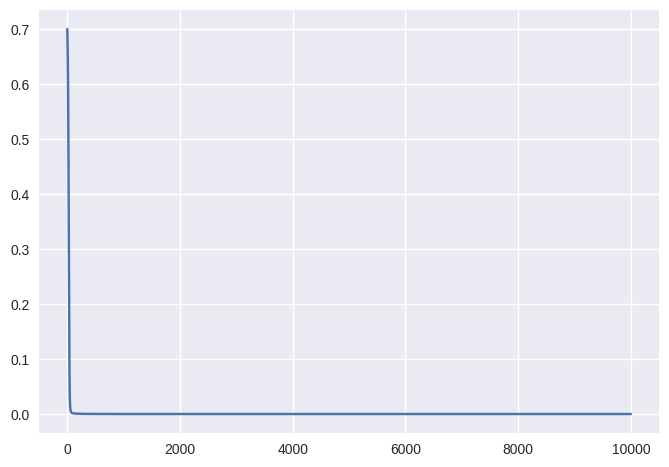

In [17]:
LEARNING_RATE = 0.03
NUM_EPOCHS = 10000

layers = [2, 6, 3, 1]
# (2, 6), (6, 3), (3, 1)
xor = NeuralNetwork(layers, activation=F.relu).to(device)
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.Adam(xor.parameters(), lr=LEARNING_RATE)
losses = []

for epoch in range(NUM_EPOCHS):

    for batch_inputs, batch_labels in xor_dataloader:
    
        optimizer.zero_grad()
        outputs = xor(batch_inputs)
        loss = criterion(outputs, batch_labels)
        
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
    

print(f"Final loss = {losses[-1]}")
plt.plot(range(NUM_EPOCHS), losses)
plt.show()

In [ ]:
preds = xor(X.to(device))
print(preds)

# Q4) MNIST

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x))
])

mnist_trainset = torchvision.datasets.MNIST(root='../datasets/MNIST/', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='../datasets/MNIST', train=False, download=True, transform=transform)

data_loading_params = {'batch_size': 16,
                       'shuffle': True,
                       'num_workers': 6
                      }

train_data = torch.utils.data.DataLoader(mnist_trainset, **data_loading_params)
test_data = torch.utils.data.DataLoader(mnist_testset, **data_loading_params)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NeuralNetwork(nn.Module):
    
    def __init__(self, layer_sizes, activation=F.relu):
        super(NeuralNetwork, self).__init__()
        self.linears = nn.ModuleList(
            [nn.Linear(v, layer_sizes[i+1]) for i, v in enumerate(layer_sizes[:-1])]
        )
        self.activation = activation
        
    def forward(self, x):
        for l in self.linears[:-1]:
            x = self.activation(l(x))

        x = self.linears[-1](x)
            
        return x

In [ ]:
def fit(model, train_data, criterion, optimizer, num_epochs=10):

    for epoch in tqdm(range(num_epochs), desc="Epochs", leave=False):
        for local_batch, local_labels in tqdm(train_data, desc="Batches", leave=False):
    
            local_batch, local_labels = local_batch.to(device), local_labels.to(device)
                
            optimizer.zero_grad()
            loss = criterion(model(local_batch), local_labels)
    
            loss.backward()
            optimizer.step()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

LEARNING_RATE = 0.003

model = NeuralNetwork(layer_sizes=[784, 100, 100, 10]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

fit(model, train_data, criterion, optimizer, num_epochs=10)

In [ ]:
def calculate_accuracy(model, data_loader):
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
    
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
                
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        # Calculate accuracy
    accuracy = 100 * correct / total
    return accuracy

In [ ]:
print(calculate_accuracy(model, train_data), calculate_accuracy(model, test_data))